In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.widgets import Slider
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("Andhra_Pradesh.csv")
test=pd.read_csv("Test.csv")
train=pd.read_csv("Train.csv")

In [3]:
df.head()

,circle,cluster,Time,Attempt,Answered,CSSR,ASR,Day_of_week,Hour
0,Andhra Pradesh,cluster 1,2023-06-27-00,515378,247413,99.79,47.61,Tuesday,0
1,Andhra Pradesh,cluster 1,2023-06-27-01,253160,121587,99.77,47.65,Tuesday,1
2,Andhra Pradesh,cluster 1,2023-06-27-02,163200,77928,99.72,47.35,Tuesday,2
3,Andhra Pradesh,cluster 1,2023-06-27-03,177094,83188,99.20,46.59,Tuesday,3
4,Andhra Pradesh,cluster 1,2023-06-27-04,288626,141959,99.73,48.78,Tuesday,4


In [4]:
df.describe()

,Attempt,Answered,CSSR,ASR,Hour
count,2.159000e+03,2.159000e+03,2159.000000,2159.000000,2159.000000
mean,4.615782e+06,2.613184e+06,99.803979,51.202645,11.505327
std,3.853882e+06,2.192251e+06,0.097916,5.477262,6.920965
min,1.588850e+05,7.535200e+04,98.800000,33.820000,0.000000
25%,2.887325e+05,1.420185e+05,99.750000,47.500000,6.000000
50%,5.154426e+06,2.875215e+06,99.800000,52.380000,12.000000
75%,8.604536e+06,4.871928e+06,99.860000,56.440000,17.500000
max,9.651840e+06,5.465132e+06,100.000000,59.250000,23.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   circle       2159 non-null   object 
 1   cluster      2159 non-null   object 
 2   Time         2159 non-null   object 
 3   Attempt      2159 non-null   int64  
 4   Answered     2159 non-null   int64  
 5   CSSR         2159 non-null   float64
 6   ASR          2159 non-null   float64
 7   Day_of_week  2159 non-null   object 
 8   Hour         2159 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 151.9+ KB


In [6]:
df.shape

(2159, 9)

In [7]:
df.isnull().sum() #no null values

circle         0
cluster        0
Time           0
Attempt        0
Answered       0
CSSR           0
ASR            0
Day_of_week    0
Hour           0
dtype: int64

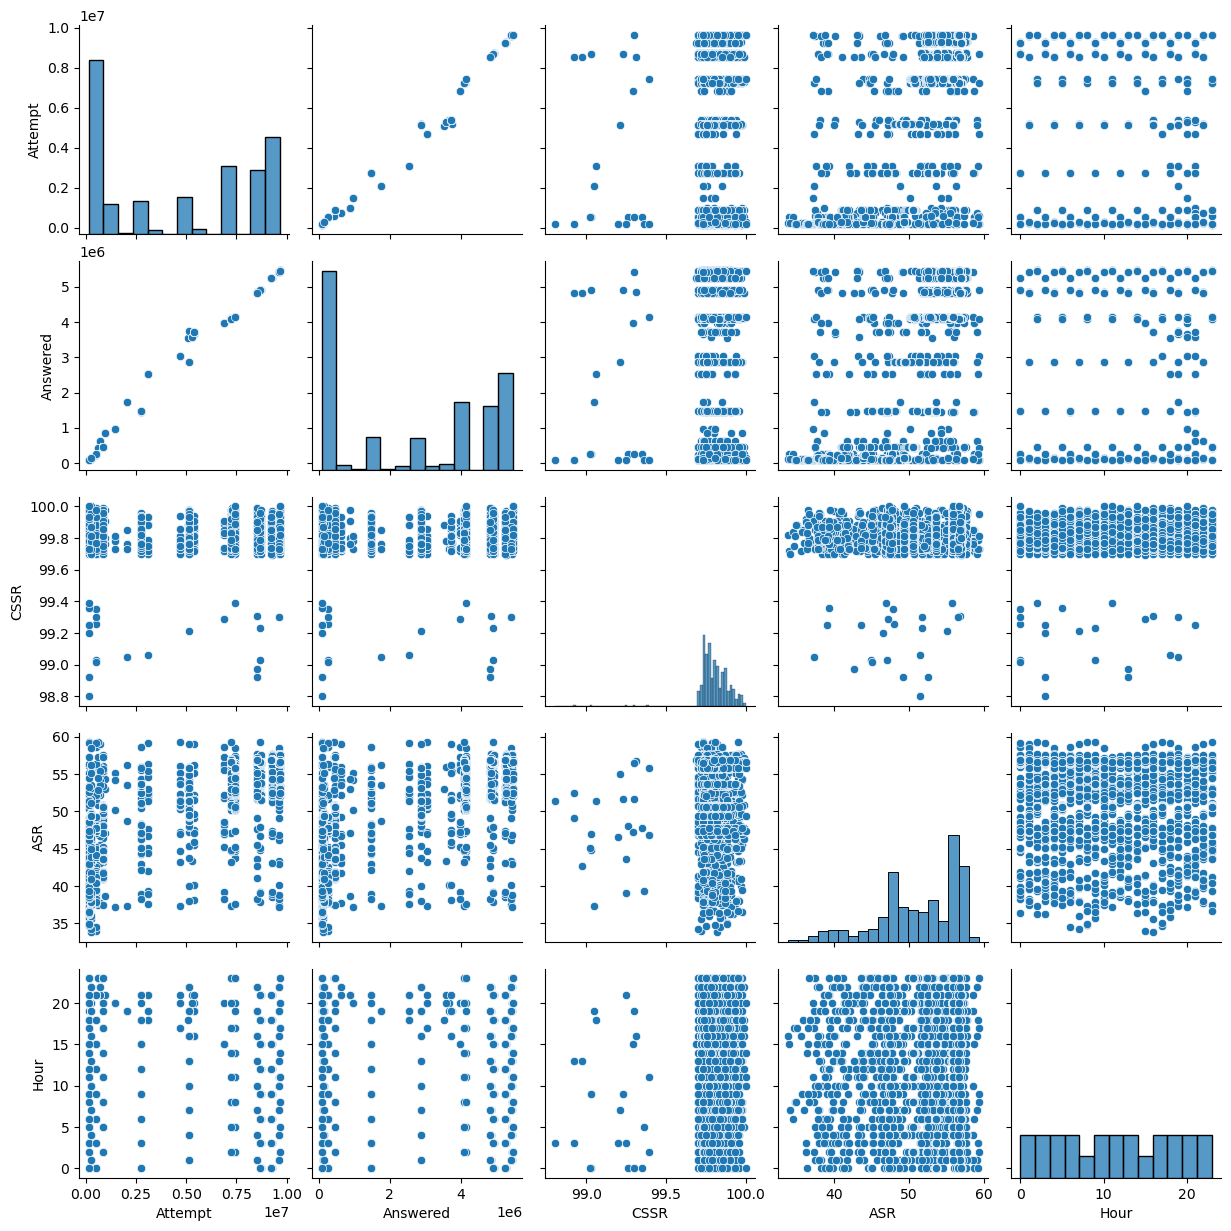

In [8]:
sns.pairplot(df)
plt.show()

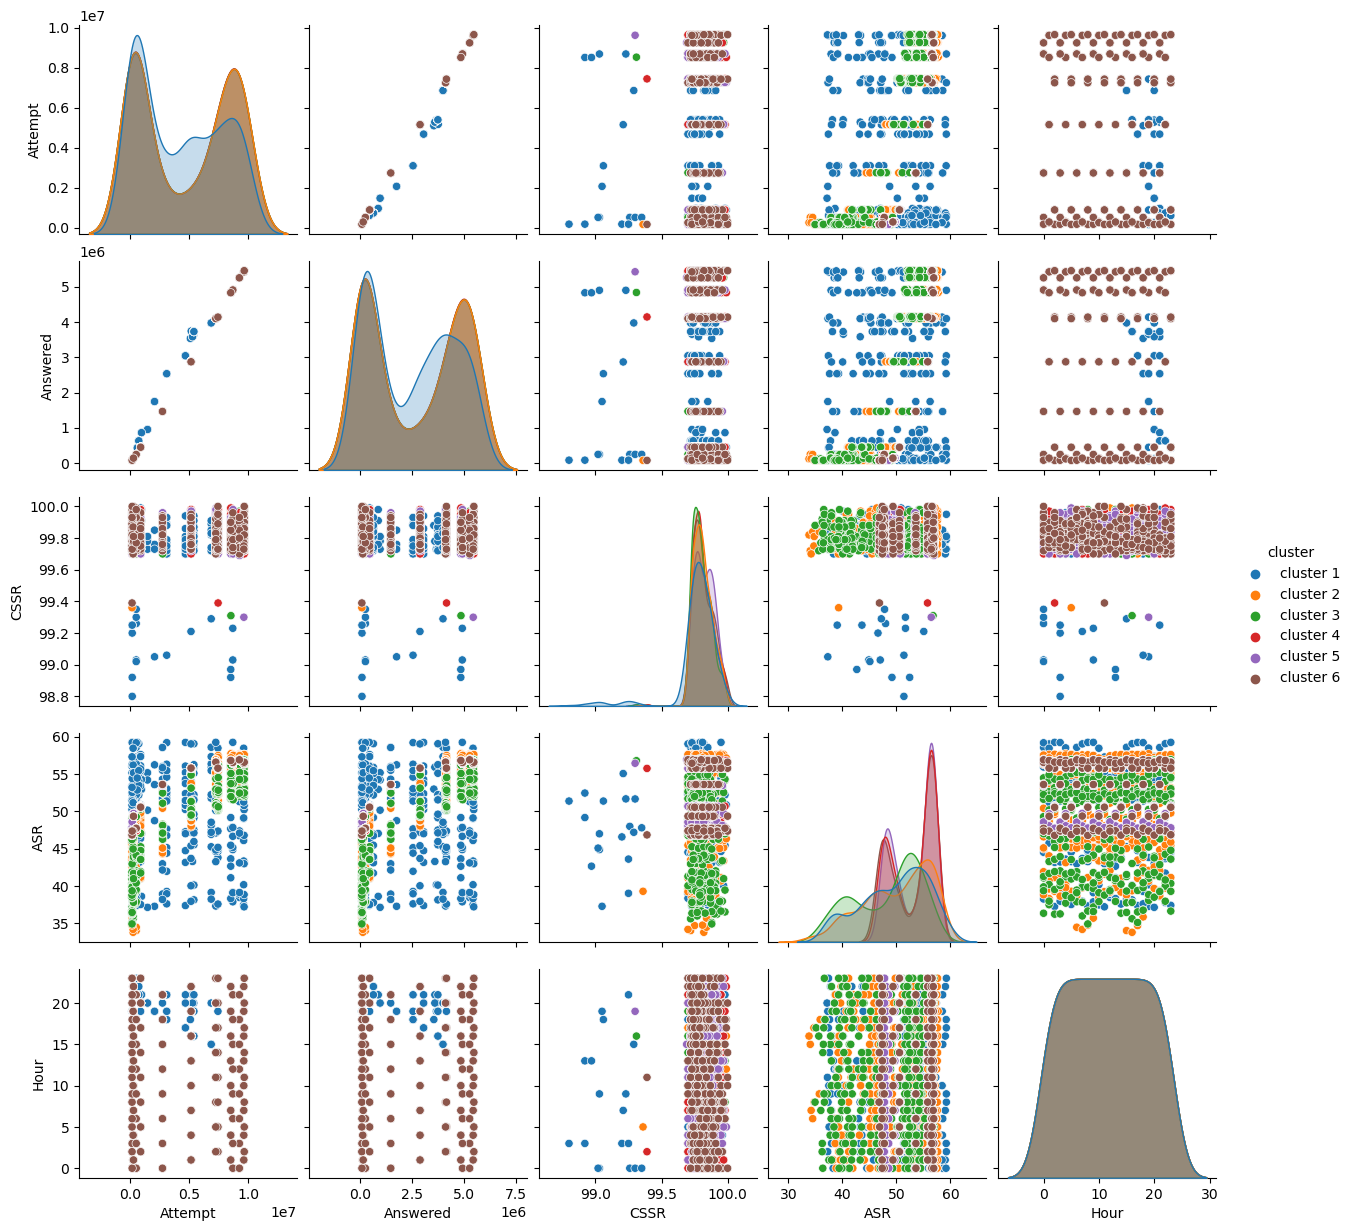

In [9]:
sns.pairplot(df,hue="cluster")
plt.show()

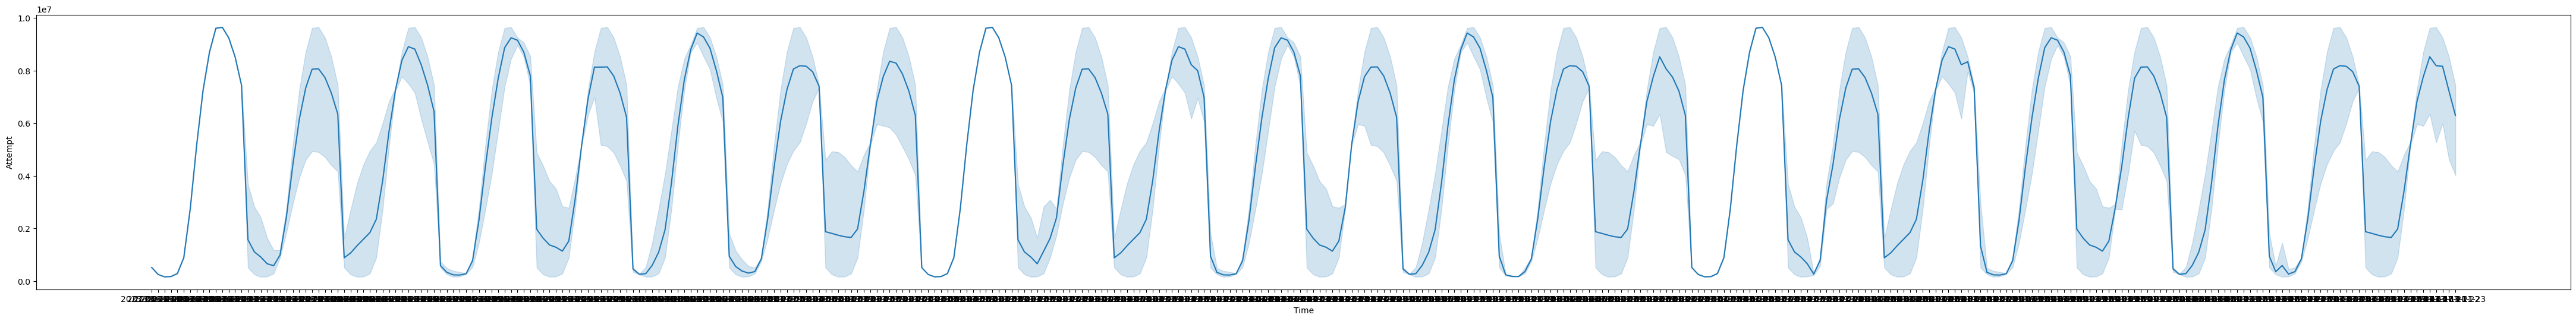

In [10]:
plt.figure(figsize=(55,6))
sns.lineplot(x="Time",y="Attempt",data=df)
plt.show()

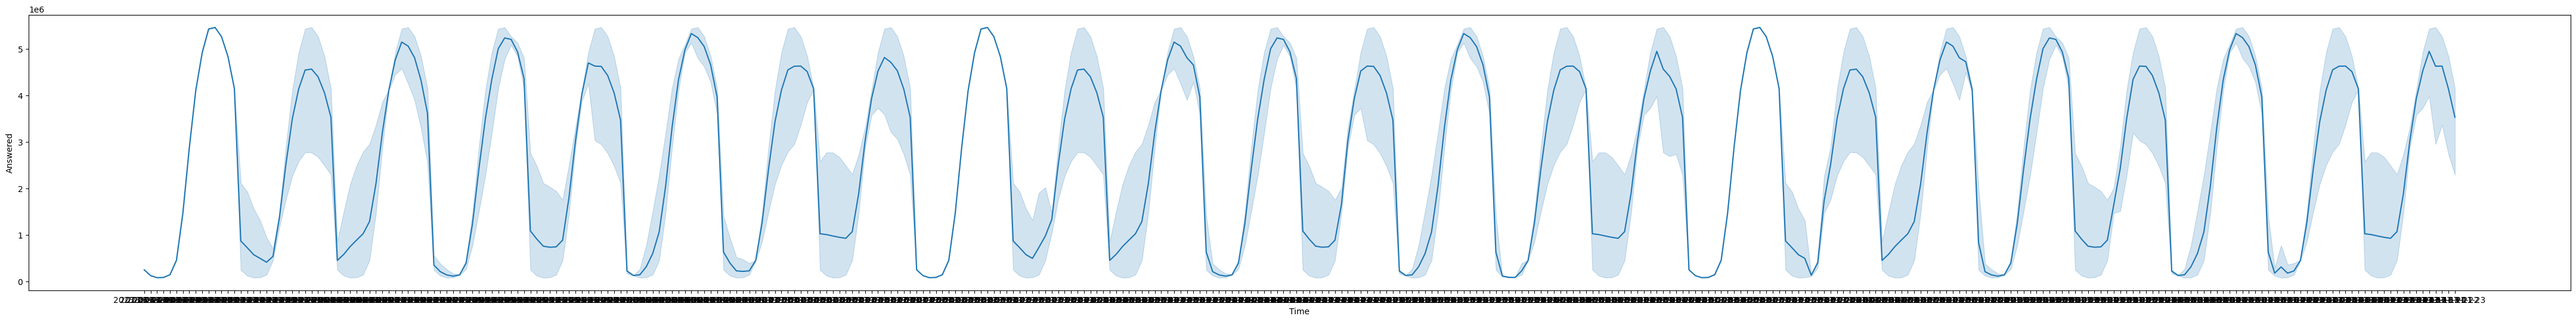

In [11]:
plt.figure(figsize=(55,6))
sns.lineplot(x="Time",y="Answered",data=df)

plt.show()

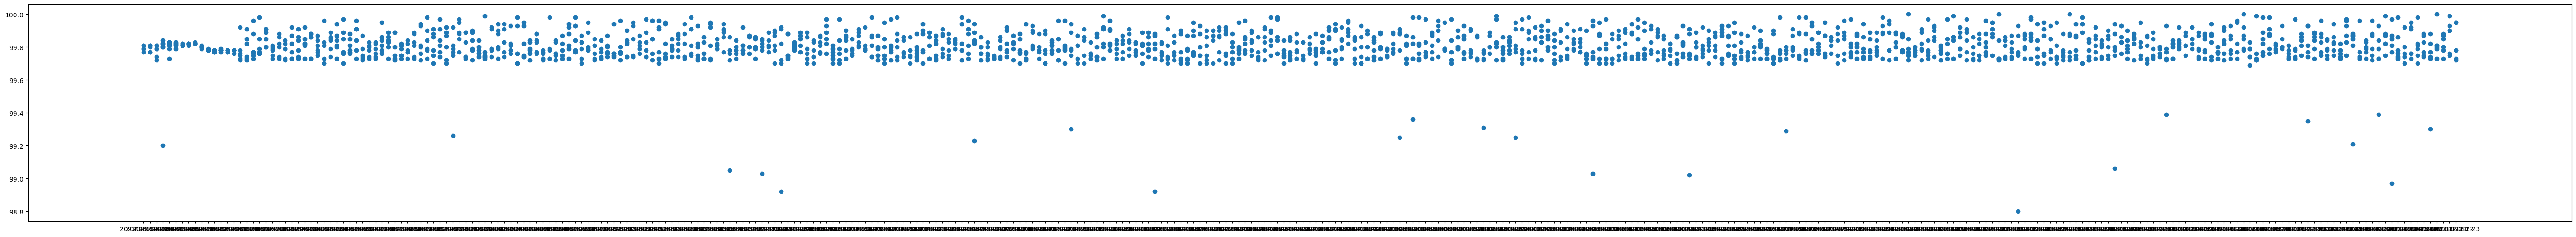

In [12]:
plt.figure(figsize=(70,6))
plt.scatter(x="Time",y="CSSR",data=df)
plt.show()

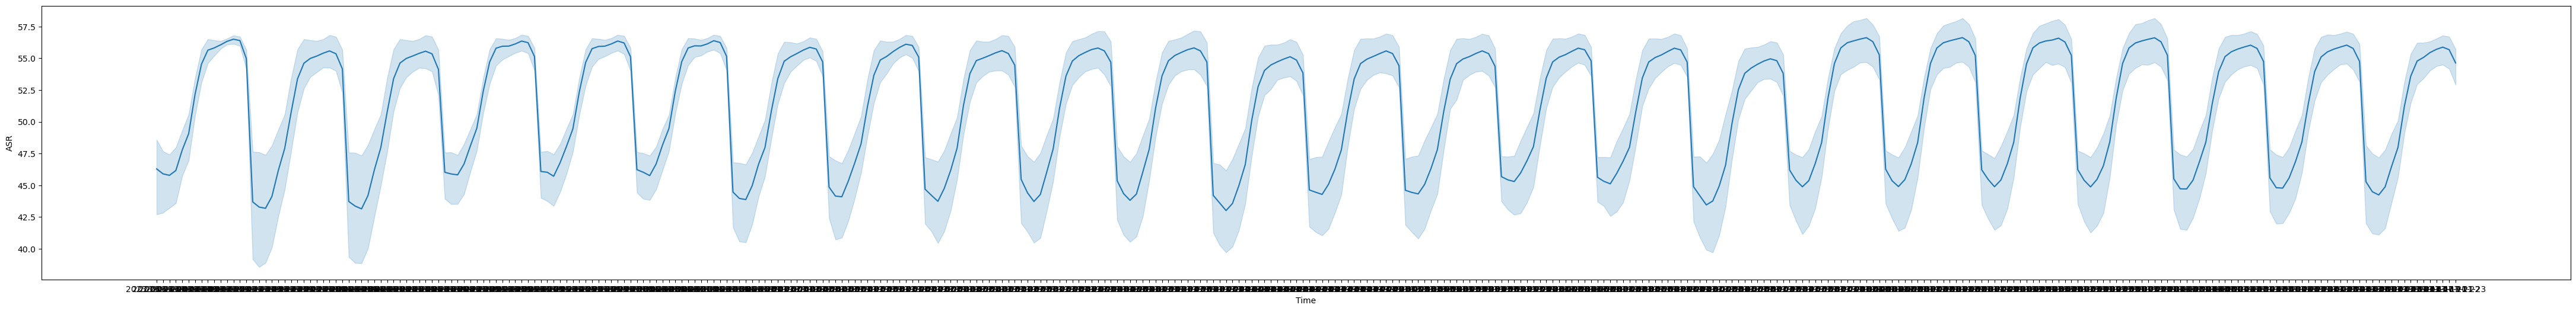

In [13]:
plt.figure(figsize=(55,6))
sns.lineplot(x="Time",y="ASR",data=df)
plt.show()

In [14]:
corre=df.corr()

In [15]:
corre

,Attempt,Answered,CSSR,ASR,Hour
Attempt,1.000000,0.998535,-0.012086,0.676872,0.029973
Answered,0.998535,1.000000,-0.016603,0.673092,0.040624
CSSR,-0.012086,-0.016603,1.000000,0.032553,0.031577
ASR,0.676872,0.673092,0.032553,1.000000,0.011989
Hour,0.029973,0.040624,0.031577,0.011989,1.000000


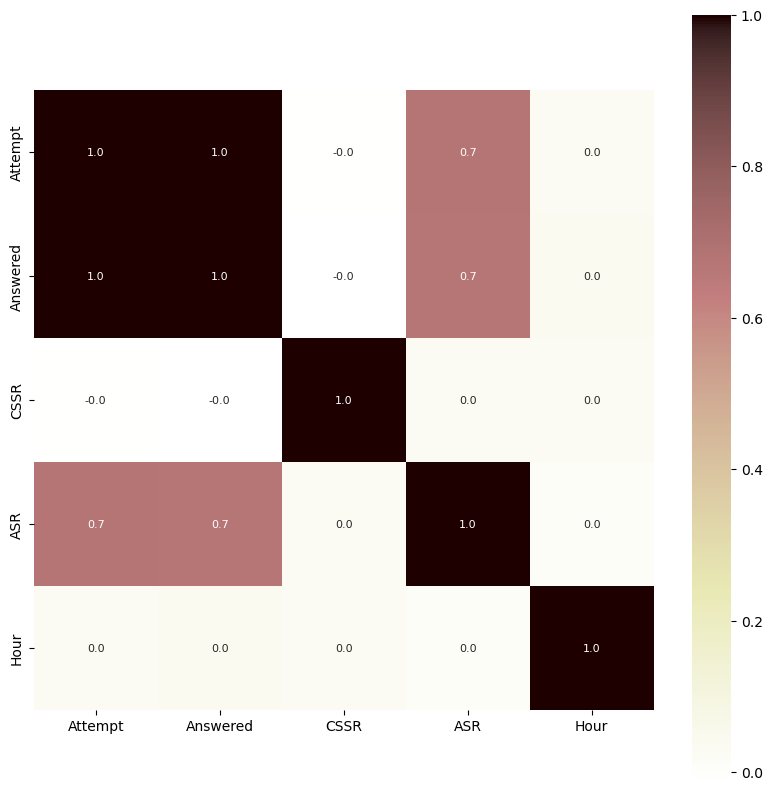

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corre,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="pink_r")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
dof_encoder=LabelEncoder()
cluster_encoder=LabelEncoder()
train['dow'] = dof_encoder.fit_transform(train['Day_of_week'])
train['cl'] = cluster_encoder.fit_transform(train['cluster'])
test['dow'] = dof_encoder.transform(test['Day_of_week'])
test['cl'] = cluster_encoder.transform(test['cluster'])

In [19]:
train.head(200)
# train['Day_of_week'] = encoder.inverse_transform(train['Day_of_week'])
# train['cluster'] = encoder.inverse_transform(train['cluster'])

,circle,cluster,Time,Attempt,Answered,CSSR,ASR,Day_of_week,Hour,dow,cl
0,Andhra Pradesh,cluster 1,2023-06-27-00,515378,247413,99.79,47.61,Tuesday,0,5,0
1,Andhra Pradesh,cluster 1,2023-06-27-01,253160,121587,99.77,47.65,Tuesday,1,5,0
2,Andhra Pradesh,cluster 1,2023-06-27-02,163200,77928,99.72,47.35,Tuesday,2,5,0
3,Andhra Pradesh,cluster 1,2023-06-27-03,177094,83188,99.20,46.59,Tuesday,3,5,0
4,Andhra Pradesh,cluster 1,2023-06-27-04,288626,141959,99.73,48.78,Tuesday,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...
195,Andhra Pradesh,cluster 2,2023-06-27-03,170803,82147,99.80,39.80,Tuesday,3,5,1
196,Andhra Pradesh,cluster 2,2023-06-27-04,287152,141151,99.81,43.14,Tuesday,4,5,1
197,Andhra Pradesh,cluster 2,2023-06-27-05,890717,450552,99.81,45.11,Tuesday,5,5,1
198,Andhra Pradesh,cluster 2,2023-06-27-06,2741927,1465373,99.81,48.28,Tuesday,6,5,1


In [20]:
Y_variable = input("Choose the target variable (CSSR/ASR): ")

valid_columns = ["CSSR", "ASR"]
if Y_variable not in valid_columns:
    raise ValueError("Invalid target variable. Please choose from CSSR, or ASR.")


Choose the target variable (CSSR/ASR): CSSR


In [21]:
X_train = train[['dow', 'Hour', 'cl']]
Y_train = train[Y_variable]


In [22]:
X_test = test[['dow', 'Hour', 'cl']]
Y_test = test[Y_variable]

In [23]:
### feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_test

array([[ 1.38586973, -1.66132477, -1.46348772],
       [ 1.38586973, -1.51686175, -1.46348772],
       [ 1.38586973, -1.37239873, -1.46348772],
       ...,
       [ 0.8819171 ,  1.37239873,  1.46247176],
       [ 0.8819171 ,  1.51686175,  1.46247176],
       [ 0.8819171 ,  1.66132477,  1.46247176]])

In [32]:
def random_forest():
    print("Random Forest Model Selected")
    rf = RandomForestRegressor()
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    from sklearn.metrics import mean_squared_error
    x = mean_squared_error(Y_test, Y_pred)
    y=np.sqrt(x)
    print("RMSE without hyperparameter tuning", y)
    param_grid = {
        'max_features': ['sqrt', 'log2'],
        'max_depth': range(10, 51, 10),
    }
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    print("best parameters are:", best_params)
    best_xgb = grid_search.best_estimator_
    Y_pred = best_xgb.predict(X_test)  # Assign to a new variable to avoid overwriting Y_pred
    x = mean_squared_error(Y_test, Y_pred)
    y = np.sqrt(x)
    print("RMSE with hyperparameter tuning", y)
    return [Y_pred,y]  


In [41]:

def decision_tree():
    print("Decision Tree Model Selected")
    dt = DecisionTreeRegressor()
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)
    from sklearn.metrics import mean_squared_error
    x = mean_squared_error(Y_test, Y_pred)
    y = np.sqrt(x)
    print("RMSE without hyperparameter tuning", y)
    param_grid = {
        'max_features': [None, 'sqrt', 'log2'],
        'max_depth': range(5, 30, 5),
    }
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    print("best parameters are:", best_params)
    best_dt = grid_search.best_estimator_
    Y_pred = best_dt.predict(X_test)  # Assign to a new variable to avoid overwriting Y_pred
    x = mean_squared_error(Y_test, Y_pred)
    y = np.sqrt(x)
    print("RMSE with hyperparameter tuning", y)
    return [Y_pred, y]


In [42]:
def xgboost():
    
    print("XGBoost Model Selected")
    xgb = XGBRegressor()
    xgb.fit(X_train,Y_train)
    Y_pred=xgb.predict(X_test)
    x=mean_squared_error(Y_test,Y_pred)
    y=np.sqrt(x)
    print("RMSE without hyperparameter tuning",y)
    param_grid = {
    'n_estimators': range(100, 1001, 100),
    'max_depth': range(3, 10, 1),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    
    }
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    print("best parameters are:",best_params)
    best_xgb = grid_search.best_estimator_
    Y_pred = best_xgb.predict(X_test)
    x=mean_squared_error(Y_test,Y_pred)
    y=np.sqrt(x)
    print("RMSE with hyperparameter tuning",(np.sqrt(x)))
    return [Y_pred,y]



    

In [43]:
def gradient_boost():
    
    print("Gradient Boost Model Selected")
    model = GradientBoostingRegressor()
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    x=mean_squared_error(Y_test,Y_pred)
    y=np.sqrt(x)
    print("RMSE without hyperparameter tuning",y)
    param_grid = {
    'n_estimators': [100,200],  
    'learning_rate': [ 0.1,0.2], 
    'max_depth': [1,2,3,4],  
    
     }
    gb = GradientBoostingRegressor()
    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    best_gb = grid_search.best_estimator_
    Y_pred = best_gb.predict(X_test)
    print(Y_pred)
    x=mean_squared_error(Y_test, Y_pred)
    y=np.sqrt(x)
    print("RMSE with hyperparameter tuning",(np.sqrt(x)))
    return Y_pred, y



    
    

In [45]:
model_choice = input("Choose a model (random_forest,decision_tree, xgboost, gradient_boost): ")

if model_choice == "random_forest":
    Y_pred,y = random_forest()
elif model_choice == "decision_tree":
    Y_pred,y = decision_tree()
elif model_choice == "xgboost":
    Y_pred,y = xgboost()
elif model_choice == "gradient_boost":
    Y_pred,y = gradient_boost()
else:
    print("Invalid model choice. Please select from random_forest,decision_tree, xgboost, or gradient_boost.")

Choose a model (random_forest,decision_tree, xgboost, gradient_boost): gradient_boost
Gradient Boost Model Selected
RMSE without hyperparameter tuning 0.10586956388972105
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 100}
[99.74324929 99.78557209 99.77822716 ... 99.81634999 99.81878287
 99.81878287]
RMSE with hyperparameter tuning 0.10496509605508626


In [46]:
lower_limit= Y_pred - y


In [47]:
upper_limit = Y_pred + y

In [48]:


lower_limit = pd.Series(lower_limit)
upper_limit = pd.Series(upper_limit)



In [49]:
Y_test

0        99.73
1        99.78
2        99.76
3        99.25
4        99.70
         ...  
1003     99.73
1004    100.00
1005     99.80
1006     99.90
1007     99.95
Name: CSSR, Length: 1008, dtype: float64

In [50]:
print(Y_test.index)

RangeIndex(start=0, stop=1008, step=1)


In [51]:

test['dow'] = dof_encoder.inverse_transform(test['dow'])


In [52]:
test['cl'] = cluster_encoder.inverse_transform(test['cl'])

In [53]:
test


,circle,cluster,Time,Attempt,Answered,CSSR,ASR,Day_of_week,Hour,dow,cl
0,Andhra Pradesh,cluster 1,2023-07-05-00,515380,247471,99.73,52.23,Wednesday,0,Wednesday,cluster 1
1,Andhra Pradesh,cluster 1,2023-07-05-01,253257,121660,99.78,51.63,Wednesday,1,Wednesday,cluster 1
2,Andhra Pradesh,cluster 1,2023-07-05-02,163215,78004,99.76,50.85,Wednesday,2,Wednesday,cluster 1
3,Andhra Pradesh,cluster 1,2023-07-05-03,177097,83270,99.25,39.04,Wednesday,3,Wednesday,cluster 1
4,Andhra Pradesh,cluster 1,2023-07-05-04,288718,142036,99.70,38.37,Wednesday,4,Wednesday,cluster 1
...,...,...,...,...,...,...,...,...,...,...,...
1003,Andhra Pradesh,cluster 6,2023-07-11-19,9612173,5425604,99.73,56.45,Tuesday,19,Tuesday,cluster 6
1004,Andhra Pradesh,cluster 6,2023-07-11-20,9647802,5459359,100.00,56.59,Tuesday,20,Tuesday,cluster 6
1005,Andhra Pradesh,cluster 6,2023-07-11-21,9237342,5256951,99.80,56.91,Tuesday,21,Tuesday,cluster 6
1006,Andhra Pradesh,cluster 6,2023-07-11-22,8508159,4834157,99.90,56.82,Tuesday,22,Tuesday,cluster 6


In [54]:

existing_df = pd.read_csv('anomalies1.csv')

anomalies = []
anomaly_rows = []
threshold_range = []
anomalies_data = []  

for i in range(len(Y_test)):
    lower_limit_rounded = round(lower_limit[i], 3)
    upper_limit_rounded = round(upper_limit[i], 3)
    threshold_range.append((lower_limit_rounded, upper_limit_rounded))
    if Y_test[i] < lower_limit[i] or Y_test[i] > upper_limit[i]:
        anomalies.append(i)  
        anomaly_rows.append(test.iloc[Y_test.index[i]])


for i, row in zip(anomalies, anomaly_rows):
    data = {
        "Row": i,
        "circle": row["circle"],
        "cl": row["cl"],
        "Time": row["Time"],
        "Attempt": row["Attempt"],
        "Answered": row["Answered"],
        "CSSR": row["CSSR"],
        "ASR": row["ASR"],
        "dow": row["dow"],
        "Hour": row["Hour"],
        "Lower Limit": threshold_range[i][0],
        "Upper Limit": threshold_range[i][1]
    }
    anomalies_data.append(data)

new_data = pd.DataFrame(anomalies_data)


new_data.to_csv('anomalies1.csv', index=False)


In [55]:
new_data.head(50)


,Row,circle,cl,Time,Attempt,Answered,CSSR,ASR,dow,Hour,Lower Limit,Upper Limit
0,3,Andhra Pradesh,cluster 1,2023-07-05-03,177097,83270,99.25,39.04,Wednesday,3,99.668,99.878
1,7,Andhra Pradesh,cluster 1,2023-07-05-07,5147476,2869414,99.97,40.05,Wednesday,7,99.691,99.901
2,9,Andhra Pradesh,cluster 1,2023-07-05-09,8681014,4903001,99.96,46.67,Wednesday,9,99.672,99.882
3,21,Andhra Pradesh,cluster 1,2023-07-05-21,177097,83270,99.25,43.62,Wednesday,21,99.681,99.891
4,23,Andhra Pradesh,cluster 1,2023-07-05-23,605482,431406,99.90,44.51,Wednesday,23,99.684,99.894
5,25,Andhra Pradesh,cluster 1,2023-07-06-01,253236,121650,99.93,49.71,Thursday,1,99.675,99.885
6,28,Andhra Pradesh,cluster 1,2023-07-06-04,288663,141966,99.91,53.10,Thursday,4,99.681,99.891
7,33,Andhra Pradesh,cluster 1,2023-07-06-09,8681036,4903052,99.03,44.89,Thursday,9,99.666,99.876
8,36,Andhra Pradesh,cluster 1,2023-07-06-12,9250102,5256925,99.88,43.11,Thursday,12,99.666,99.876
9,42,Andhra Pradesh,cluster 1,2023-07-06-18,3094640,2536631,99.93,52.53,Thursday,18,99.676,99.886


In [56]:

def filter_data(existing_df):
    clusters = existing_df['cl'].unique()
    valid_clusters = [f"cluster {i}" for i in range(1, 7)]
    print(f"Choose a cluster from {valid_clusters}: ")
    chosen_cluster = input()

    if chosen_cluster not in valid_clusters:
        print("Invalid cluster choice. Please select from the provided list.")
        return None
    else:
        filtered_data = existing_df[existing_df['cl'] == chosen_cluster]
        return filtered_data

existing_df = pd.read_csv('anomalies1.csv')
filter_data(existing_df)


Choose a cluster from ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6']: 
cluster 1


,Row,circle,cl,Time,Attempt,Answered,CSSR,ASR,dow,Hour,Lower Limit,Upper Limit
0,3,Andhra Pradesh,cluster 1,2023-07-05-03,177097,83270,99.25,39.04,Wednesday,3,99.668,99.878
1,7,Andhra Pradesh,cluster 1,2023-07-05-07,5147476,2869414,99.97,40.05,Wednesday,7,99.691,99.901
2,9,Andhra Pradesh,cluster 1,2023-07-05-09,8681014,4903001,99.96,46.67,Wednesday,9,99.672,99.882
3,21,Andhra Pradesh,cluster 1,2023-07-05-21,177097,83270,99.25,43.62,Wednesday,21,99.681,99.891
4,23,Andhra Pradesh,cluster 1,2023-07-05-23,605482,431406,99.90,44.51,Wednesday,23,99.684,99.894
5,25,Andhra Pradesh,cluster 1,2023-07-06-01,253236,121650,99.93,49.71,Thursday,1,99.675,99.885
6,28,Andhra Pradesh,cluster 1,2023-07-06-04,288663,141966,99.91,53.10,Thursday,4,99.681,99.891
7,33,Andhra Pradesh,cluster 1,2023-07-06-09,8681036,4903052,99.03,44.89,Thursday,9,99.666,99.876
8,36,Andhra Pradesh,cluster 1,2023-07-06-12,9250102,5256925,99.88,43.11,Thursday,12,99.666,99.876
9,42,Andhra Pradesh,cluster 1,2023-07-06-18,3094640,2536631,99.93,52.53,Thursday,18,99.676,99.886


In [57]:
import pandas as pd

existing_df = pd.read_csv('anomaly.csv')

anomalies = []
anomaly_rows = []
threshold_range = []
anomalies_data = []  

for i in range(len(Y_test)):
    lower_limit_rounded = round(lower_limit[i], 3)
    upper_limit_rounded = round(upper_limit[i], 3)
    threshold_range.append((lower_limit_rounded, upper_limit_rounded))
    anomalies.append(i)  
    anomaly_rows.append(test.iloc[Y_test.index[i]])

for i, row in zip(anomalies, anomaly_rows):
    data = {
        "Row": i,
        "circle": row["circle"],
        "cl": row["cl"],
        "Time": row["Time"],
        "Attempt": row["Attempt"],
        "Answered": row["Answered"],
        "CSSR": row["CSSR"],
        "ASR": row["ASR"],
        "dow": row["dow"],
        "Hour": row["Hour"],
        "Lower Limit": threshold_range[i][0],
        "Upper Limit": threshold_range[i][1]
    }
    anomalies_data.append(data)

new_data = pd.DataFrame(anomalies_data)


new_data.to_csv('anomaly.csv', index=False)


In [64]:
existing_df = pd.read_csv('anomaly.csv')

existing_df['Time'] = pd.to_datetime(existing_df['Time'], format='%Y-%m-%d-%H')

print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row          1008 non-null   int64  
 1   circle       1008 non-null   object 
 2   cl           1008 non-null   object 
 3   Time         1008 non-null   object 
 4   Attempt      1008 non-null   int64  
 5   Answered     1008 non-null   int64  
 6   CSSR         1008 non-null   float64
 7   ASR          1008 non-null   float64
 8   dow          1008 non-null   object 
 9   Hour         1008 non-null   int64  
 10  Lower Limit  1008 non-null   float64
 11  Upper Limit  1008 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 94.6+ KB
None


Choose a cluster from ['cluster 1' 'cluster 2' 'cluster 3' 'cluster 4' 'cluster 5' 'cluster 6']: 
cluster 3


<Figure size 3000x2000 with 0 Axes>

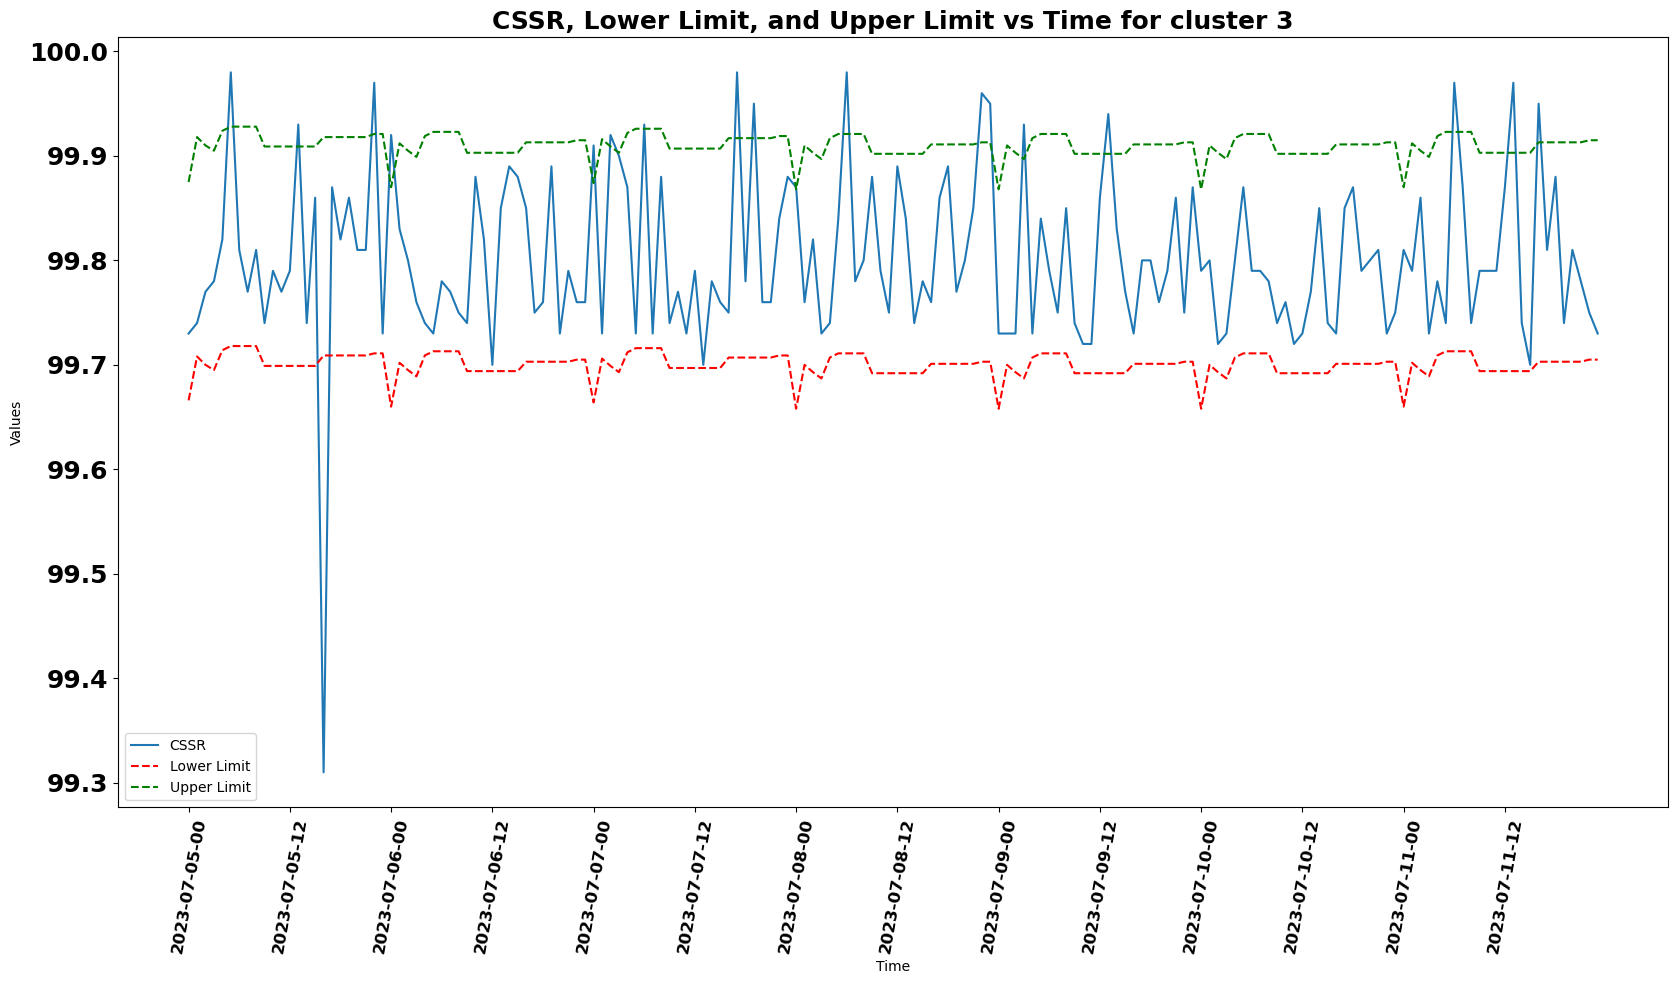

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
existing_df = pd.read_csv('anomaly.csv')


clusters = existing_df['cl'].unique()
print(f"Choose a cluster from {clusters}: ")
chosen_cluster = input()

if chosen_cluster not in clusters:
    print("Invalid cluster choice. Please select from the provided list.")
else:
    filtered_data = existing_df[existing_df['cl'] == chosen_cluster]

    plt.figure(figsize=(20, 10))
    plt.plot(filtered_data['Time'], filtered_data[Y_variable], label=Y_variable)
    plt.plot(filtered_data['Time'], filtered_data['Lower Limit'], label='Lower Limit', linestyle='--', color='r')
    plt.plot(filtered_data['Time'], filtered_data['Upper Limit'], label='Upper Limit', linestyle='--', color='g')
    plt.title(f'{Y_variable}, Lower Limit, and Upper Limit vs Time for {chosen_cluster}', fontsize=18, fontweight="bold")
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.xticks(filtered_data['Time'][::12],fontsize=12,fontweight = "bold",rotation=80)
    plt.yticks(fontsize=18,fontweight="bold")
    plt.legend()
    plt.show()


In [63]:
existing_df = pd.read_csv('anomaly.csv')
existing_df


,Row,circle,cl,Time,Attempt,Answered,CSSR,ASR,dow,Hour,Lower Limit,Upper Limit
0,0,Andhra Pradesh,cluster 1,2023-07-05-00,515380,247471,99.73,52.23,Wednesday,0,99.638,99.848
1,1,Andhra Pradesh,cluster 1,2023-07-05-01,253257,121660,99.78,51.63,Wednesday,1,99.681,99.891
2,2,Andhra Pradesh,cluster 1,2023-07-05-02,163215,78004,99.76,50.85,Wednesday,2,99.673,99.883
3,3,Andhra Pradesh,cluster 1,2023-07-05-03,177097,83270,99.25,39.04,Wednesday,3,99.668,99.878
4,4,Andhra Pradesh,cluster 1,2023-07-05-04,288718,142036,99.70,38.37,Wednesday,4,99.687,99.897
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1003,Andhra Pradesh,cluster 6,2023-07-11-19,9612173,5425604,99.73,56.45,Tuesday,19,99.711,99.921
1004,1004,Andhra Pradesh,cluster 6,2023-07-11-20,9647802,5459359,100.00,56.59,Tuesday,20,99.711,99.921
1005,1005,Andhra Pradesh,cluster 6,2023-07-11-21,9237342,5256951,99.80,56.91,Tuesday,21,99.711,99.921
1006,1006,Andhra Pradesh,cluster 6,2023-07-11-22,8508159,4834157,99.90,56.82,Tuesday,22,99.714,99.924
